In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('Amazon-Sales.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.shape

(128976, 21)

In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [ ]:
df.drop(columns=['index'],axis=1,inplace=True)

In [10]:
df.describe()

,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,0.904401,648.562176,463945.677744,NaN,NaN
std,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,110001.000000,NaN,NaN
25%,1.000000,449.000000,382421.000000,NaN,NaN
50%,1.000000,605.000000,500033.000000,NaN,NaN
75%,1.000000,788.000000,600024.000000,NaN,NaN
max,15.000000,5584.000000,989898.000000,NaN,NaN


### Handling Null values 

In [11]:
df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [12]:
df.drop(columns=['New','PendingS'],axis=1,inplace=True)

### Currency column 

In [13]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [14]:
df[df['currency'].isna()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,0,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XXL,Cancelled,0,NaN,NaN,Dahod,Gujarat,389151.0,IN,False,NaN
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500072.0,IN,False,NaN
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,0,NaN,NaN,PUNE,MAHARASHTRA,411046.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,406-3923120-4345139,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN
128908,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128909,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN
128959,408-9513596-4393945,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,NaN,NaN,Bengaluru,KARNATAKA,560037.0,IN,False,NaN


In [15]:
df['currency'].mode()[0]

'INR'

In [16]:
df['currency'].fillna(df['currency'].mode()[0],inplace=True)

### Status column

In [71]:
df['Status'].unique()

array(['Cancelled', 'Delivered', 'Shipped', 'Returned', 'Rejected',
       'Lost in Transit', 'Out for Delivery', 'Returning', 'Picked Up',
       'Pending', 'Waiting-Pick Up', 'Damaged', 'Shipping'], dtype=object)

In [69]:
status_mapping = {
    'Cancelled': 'Cancelled',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Shipped': 'Shipped',
    'Shipped - Returned to Seller': 'Returned',
    'Shipped - Rejected by Buyer': 'Rejected',
    'Shipped - Lost in Transit': 'Lost in Transit',
    'Shipped - Out for Delivery': 'Out for Delivery',
    'Shipped - Returning to Seller': 'Returning',
    'Shipped - Picked Up': 'Picked Up',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Waiting-Pick Up',
    'Shipped - Damaged': 'Damaged',
    'Shipping': 'Shipping'
}

In [70]:
df['Status'] = df['Status'].replace(status_mapping)


### Amount column 

In [21]:
df['Amount']

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128971     517.00
128972     999.00
128973     690.00
128974    1199.00
128975     696.00
Name: Amount, Length: 128976, dtype: float64

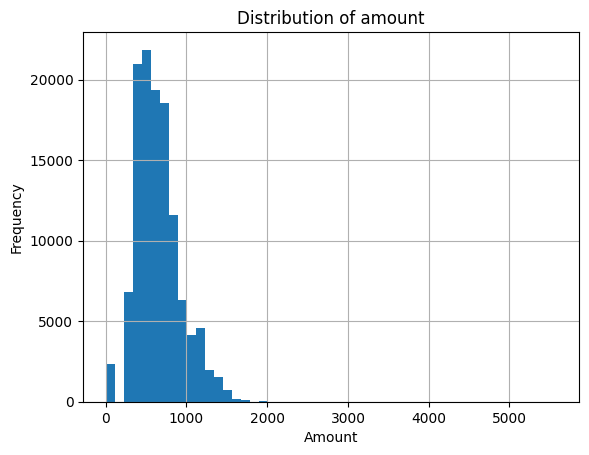

In [22]:
df['Amount'].hist(bins=50)
plt.title('Distribution of amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [23]:
df['Amount'].skew()

0.8859651066771677

In [24]:
df['Amount'].median()

605.0

In [25]:
df['Amount'].fillna(df['Amount'].median(),inplace=True)

In [26]:
df['Amount'].isna().sum()

0

### Fulfilledby column

In [27]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [28]:
df['fulfilled-by'].fillna(df['fulfilled-by'].mode()[0],inplace=True)

### Shipping related columns 

In [29]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [30]:
columns = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
for col in columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print()  


Unique values in ship-city:
['MUMBAI' 'BENGALURU' 'NAVI MUMBAI' ... 'GULABPURA, Distt BHILWARA'
 'Prayagraj (ALLAHABAD)' 'Halol']

Unique values in ship-state:
['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TAMIL NADU' 'UTTAR PRADESH'
 'CHANDIGARH' 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA'
 'ASSAM' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'Gujarat' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH' 'Goa'
 'MEGHALAYA' 'GOA' 'MANIPUR' 'TRIPURA' 'LADAKH' 'DADRA AND NAGAR' 'SIKKIM'
 'Delhi' nan 'ANDAMAN & NICOBAR' 'Punjab' 'Rajshthan' 'Manipur'
 'rajasthan' 'Odisha' 'NL' 'Bihar' 'MIZORAM' 'punjab' 'New Delhi'
 'Rajasthan' 'Punjab/Mohali/Zirakpur' 'Puducherry' 'delhi' 'RJ'
 'Chandigarh' 'orissa' 'LAKSHADWEEP' 'goa' 'PB' 'APO' 'Arunachal Pradesh'
 'AR' 'Pondicherry' 'Sikkim' 'Arunachal pradesh' 'Nagaland' 'bihar'
 'Mizoram' 'rajsthan' 'Orissa' 'Rajsthan' 'Meghalaya']

Unique values in ship-postal-

In [31]:
for col in columns:
    df[col].fillna(df[col].mode()[0],inplace=True)



In [32]:
# Finally dataset is cleaned
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [33]:
df['Date']= pd.to_datetime(df['Date'])

C:\Users\jatin\AppData\Local\Temp\ipykernel_12732\2691600196.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']= pd.to_datetime(df['Date'])


In [34]:
df['YearMonth'] = df['Date'].dt.to_period('M')


In [35]:
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()


In [36]:
sales_trend = df.groupby('YearMonth')['Amount'].sum().reset_index()

In [37]:
sales_trend

,YearMonth,Amount
0,2022-03-01,107128.85
1,2022-04-01,30653620.27
2,2022-05-01,27741396.75
3,2022-06-01,24807024.38


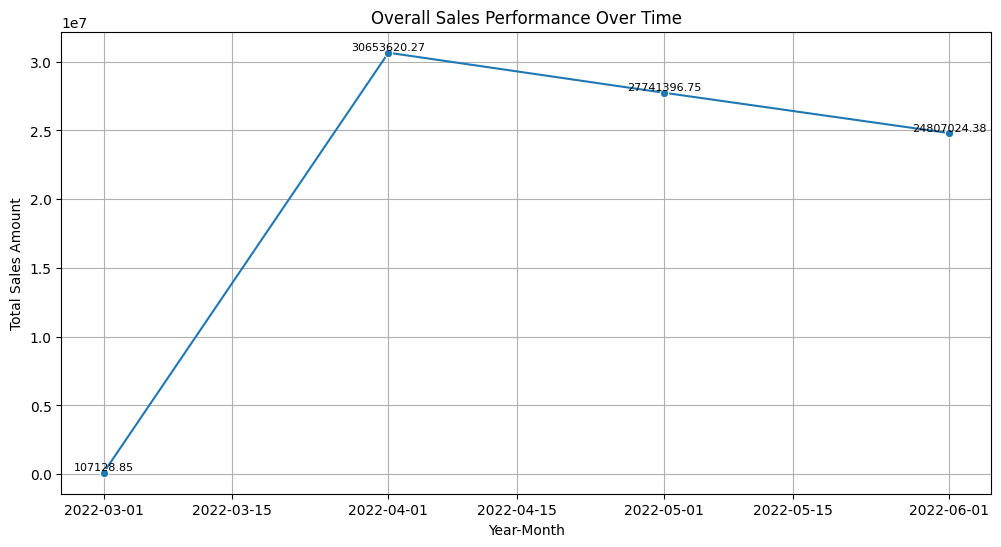

In [122]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='YearMonth', y='Amount', marker='o')
plt.title('Overall Sales Performance Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
for x, y in zip(sales_trend['YearMonth'], sales_trend['Amount']):
    plt.text(x, y + 0.5, f"{y:.2f}", ha='center', va= 'bottom', fontsize=8)

plt.show()

### Key metrics

In [39]:
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
average_order_value = total_sales / total_orders


In [40]:
print(f"Total Sales: ${total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${average_order_value:.2f}")

Total Sales: $83309170.25
Total Orders: 120229
Average Order Value: $692.92


In [130]:
total_orders = len(df)
canceled_orders = len(df[df['Status'].str.contains('Cancelled', case=False, na=False)])
delivered_orders = len(df[df['Status'].str.contains('Delivered', case=False, na=False)])
returned_orders = len(df[df['Status'].str.contains('Returned', case=False, na=False)])

percentage_canceled = (canceled_orders / total_orders) * 100
percentage_delivered = (delivered_orders/total_orders) * 100
percentage_returned = (returned_orders/total_orders) * 100


print(f"Total orders: {total_orders:.2f}")
print(f"Canceled orders: {canceled_orders:.2f}")
print(f"Delivered orders: {delivered_orders:.2f}")
print(f"Returned orders: {returned_orders:.2f}")



print(f"Percentage of Canceled orders: {percentage_canceled:.2f}%")
print(f"Percentage of Delivered orders: {percentage_delivered:.2f}%")
print(f"Percentage of Returned orders: {percentage_returned:.2f}%")

Total orders: 128976.00
Canceled orders: 18334.00
Delivered orders: 28756.00
Returned orders: 1954.00
Percentage of Canceled orders: 14.22%
Percentage of Delivered orders: 22.30%
Percentage of Returned orders: 1.52%


In [133]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [134]:
tshirts = len(df[df['Category'].str.contains('T-shirt', case=False, na=False)])


percentage_tshirt = (tshirts/total_orders) * 100
print(f"Total orders: {total_orders:.2f}")
print(f"tshirts orders: {tshirts:.2f}")
print(f"Percentage of tshirts orders: {percentage_tshirt:.2f}%")


Total orders: 128976.00
tshirts orders: 50292.00
Percentage of tshirts orders: 38.99%


### Product analysis

In [42]:
category_distribution = df['Category'].value_counts()


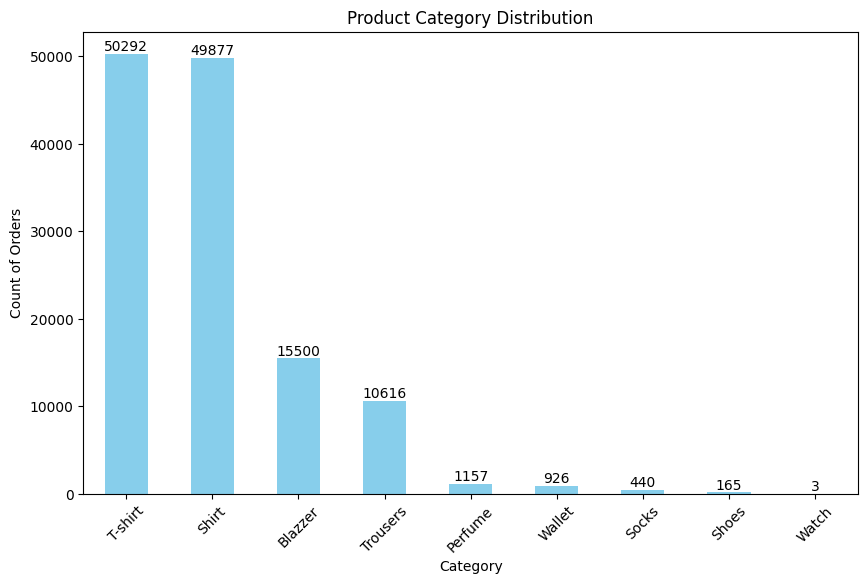

In [81]:
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
for i, value in enumerate(category_distribution):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

In [139]:
size_distribution = df['Size'].value_counts()

size_distribution

Size
M       22373
L       21807
XL      20549
XXL     17806
S       16776
3XL     14643
XS      11056
Free     2251
6XL       738
5XL       550
4XL       427
Name: count, dtype: int64

Size
Other    0
Name: count, dtype: int64

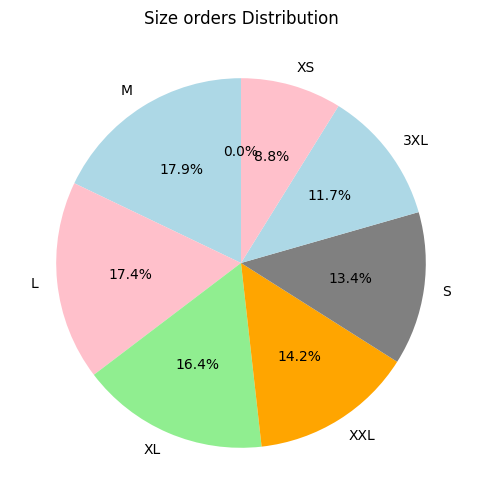

In [156]:
total_orders_size = size_distribution.sum()

threshold_percentage = 1.8

# Filter categories that are below the threshold
small_categories = size_distribution[size_distribution / total_orders_size * 100 < threshold_percentage]

# Combine small categories into 'Other'
size_distribution = size_distribution[size_distribution / total_orders_size * 100 >= threshold_percentage]
size_distribution['Other'] = small_categories.sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
size_distribution.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightblue', 'pink', 'lightgreen', 'orange', 'gray'],
    startangle=90
)
plt.title('Size orders Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()

In [72]:
status = df['Status'].value_counts()


In [73]:
status

Status
Shipped             77815
Delivered           28756
Cancelled           18334
Returned             1954
Picked Up             973
Pending               658
Waiting-Pick Up       281
Returning             145
Out for Delivery       35
Rejected               11
Shipping                8
Lost in Transit         5
Damaged                 1
Name: count, dtype: int64

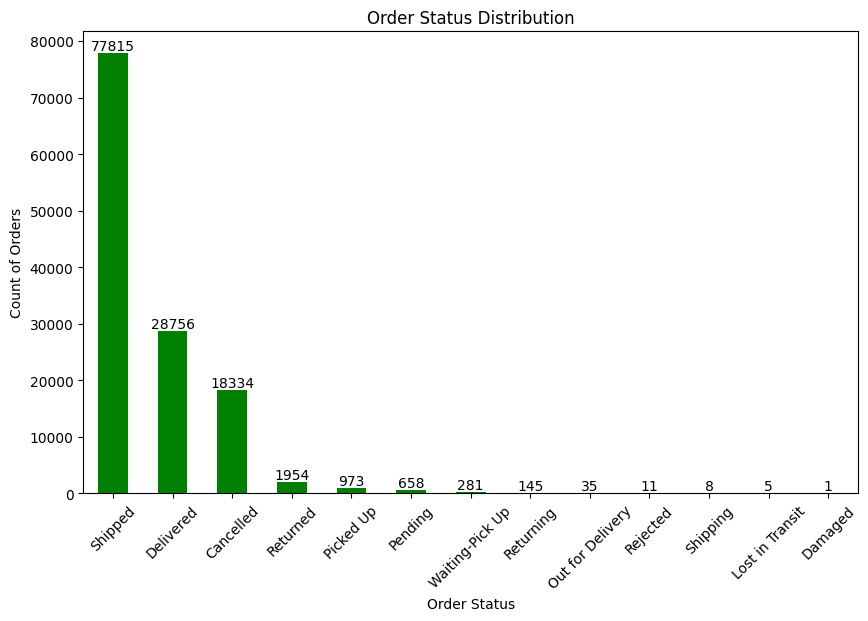

In [128]:
plt.figure(figsize=(10, 6))
status.plot(kind='bar', color='green')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
for i, value in enumerate(status):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

In [157]:
fulfillment_method = df['Fulfilment'].value_counts()
fulfillment_method


Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64

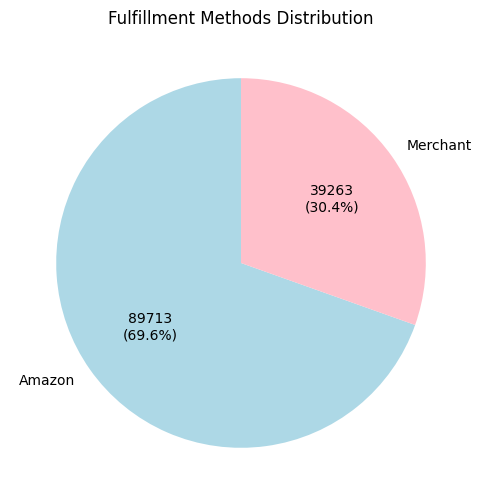

In [163]:
plt.figure(figsize=(8, 6))

# Define autopct to show both value and percentage
def func(pct, allvals):
    absolute = round(pct / 100.*sum(allvals))  # Calculate the absolute value
    return f"{absolute}\n({pct:.1f}%)"  # Format as 'value (percentage)'

# Plot the pie chart
fulfillment_method.plot(
    kind='pie',
    autopct=lambda pct: func(pct, fulfillment_method),
    colors=['lightblue', 'pink'],
    startangle=90
)

plt.title('Fulfillment Methods Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()


### Customer segmentation 

In [86]:
customer_segment = df.groupby('Order ID')['Amount'].sum().reset_index()


In [87]:
bins = [0, 50, 200, 500, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

In [88]:
customer_segment['Segment'] = pd.cut(customer_segment['Amount'], bins=bins, labels=labels)


In [89]:
segment_distribution = customer_segment['Segment'].value_counts()


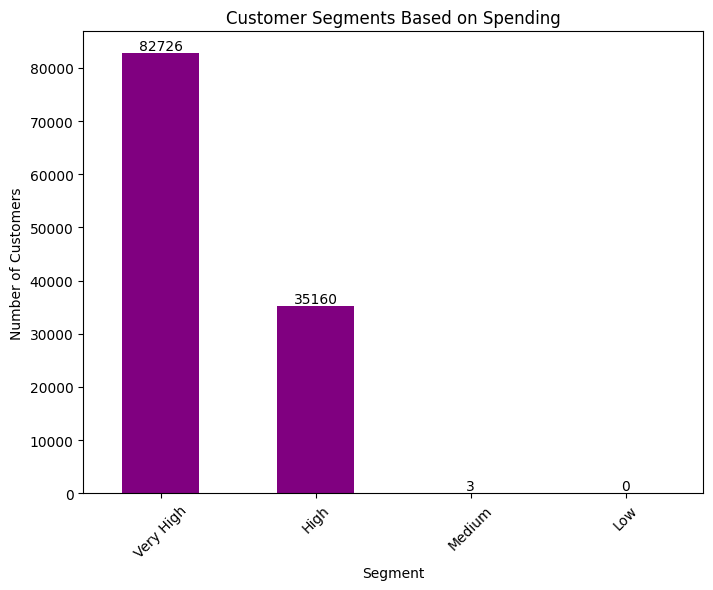

In [90]:
plt.figure(figsize=(8, 6))
segment_distribution.plot(kind='bar', color='purple')
plt.title('Customer Segments Based on Spending')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

for i, value in enumerate(segment_distribution):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

### Geographical Analysis

In [166]:
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
state_sales


ship-state
MAHARASHTRA       14079905.05
KARNATAKA         11045764.22
TELANGANA          7334888.08
UTTAR PRADESH      7241397.08
TAMIL NADU         6927557.30
DELHI              4468688.97
KERALA             4086129.58
WEST BENGAL        3758892.82
ANDHRA PRADESH     3444734.86
HARYANA            3017085.99
Name: Amount, dtype: float64

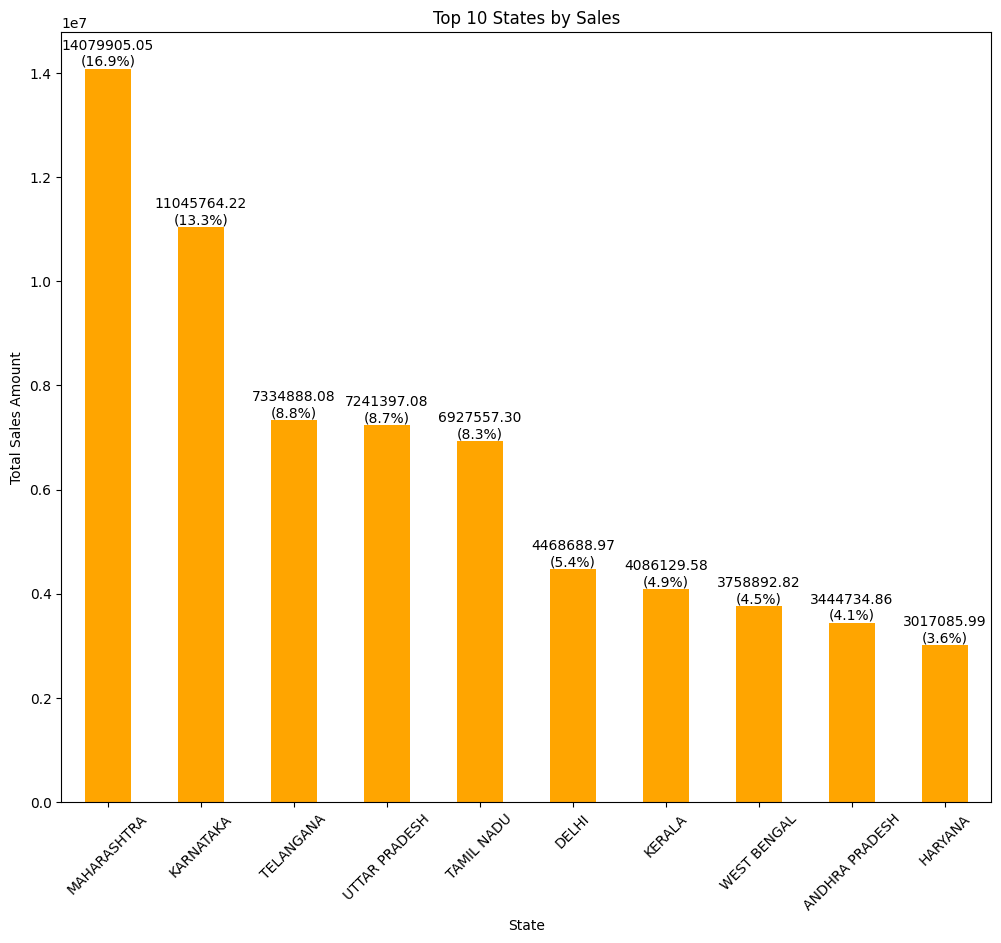

In [169]:
plt.figure(figsize=(12, 10))
state_sales.plot(kind='bar', color='orange')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)

# Calculate total sales for percentage calculation

# Add labels with value and percentage
for i, value in enumerate(state_sales):
    percentage = (value / total_sales) * 100
    plt.text(i, value + 0.5, f"{value:.2f}\n({percentage:.1f}%)", ha='center', va='bottom', fontsize=10)

plt.show()


In [96]:
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)


In [172]:
city_sales

ship-city
BENGALURU    7188687.65
HYDERABAD    5230139.25
MUMBAI       3859143.04
NEW DELHI    3821842.78
CHENNAI      3279470.74
PUNE         2463011.18
KOLKATA      1496488.87
GURUGRAM     1271987.74
THANE        1061373.29
LUCKNOW      1000996.34
Name: Amount, dtype: float64

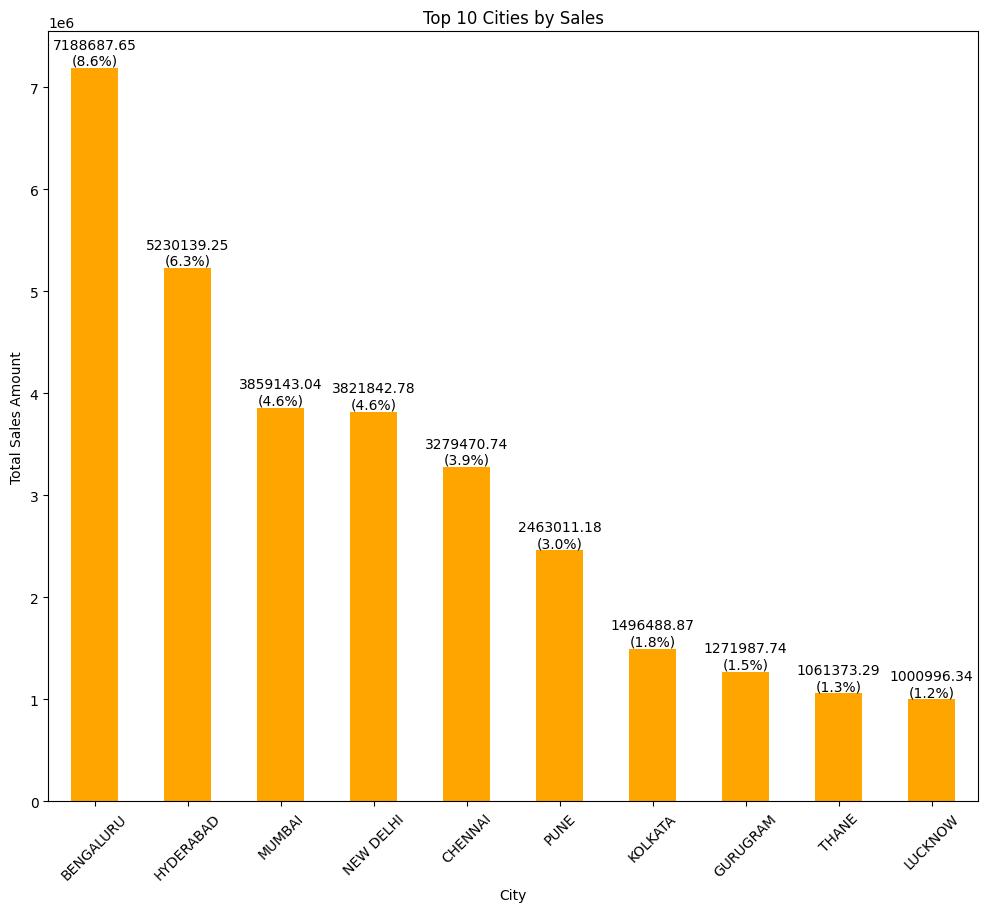

In [171]:
plt.figure(figsize=(12, 10))
city_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)

# Calculate total sales for percentage calculation

# Add labels with value and percentage
for i, value in enumerate(city_sales):
    percentage = (value / total_sales) * 100
    plt.text(i, value + 0.5, f"{value:.2f}\n({percentage:.1f}%)", ha='center', va='bottom', fontsize=10)

plt.show()


In [98]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Amount'].sum()

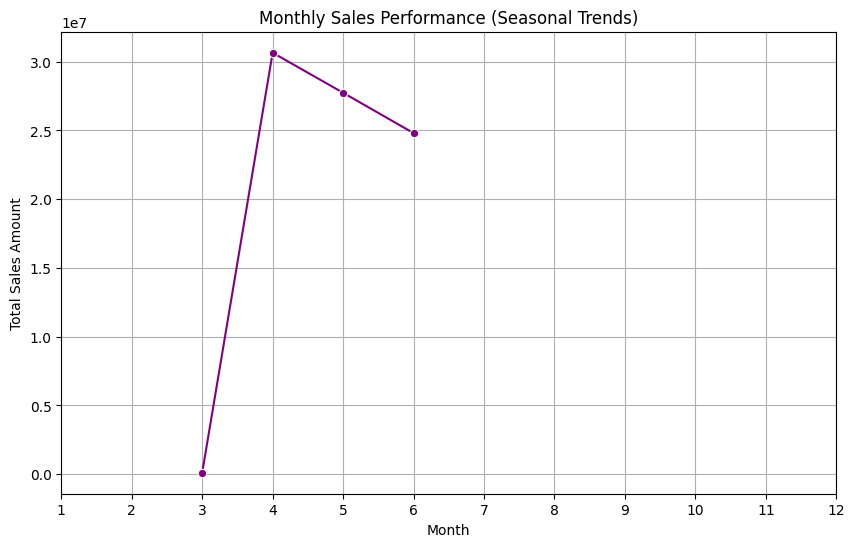

In [99]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='purple')
plt.title('Monthly Sales Performance (Seasonal Trends)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

In [100]:
top_products = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(20)


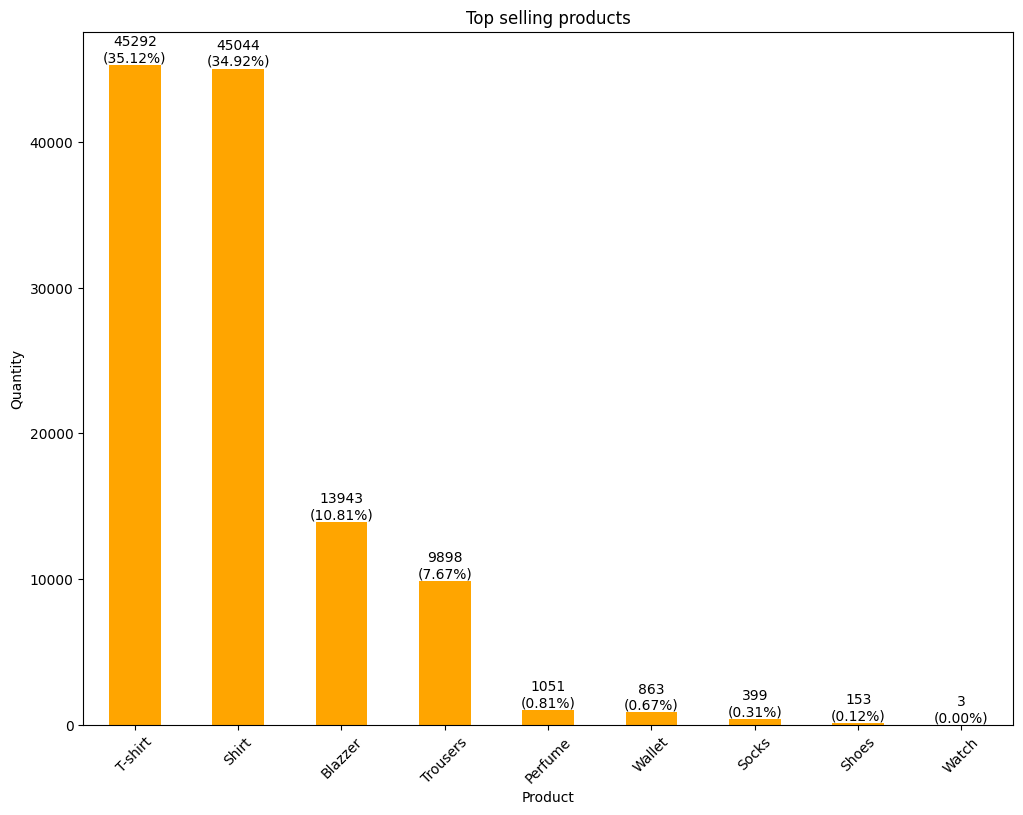

In [183]:
plt.figure(figsize=(12, 9))
top_products.plot(kind='bar', color='orange')
plt.title('Top selling products')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)

# Calculate total sales for percentage calculation

# Add labels with value and percentage
for i, value in enumerate(top_products):
    percentage = (value / total_orders) * 100
    plt.text(i, value + 0.5, f"{value:.0f}\n({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.show()


In [187]:
top_products_amount = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(20)


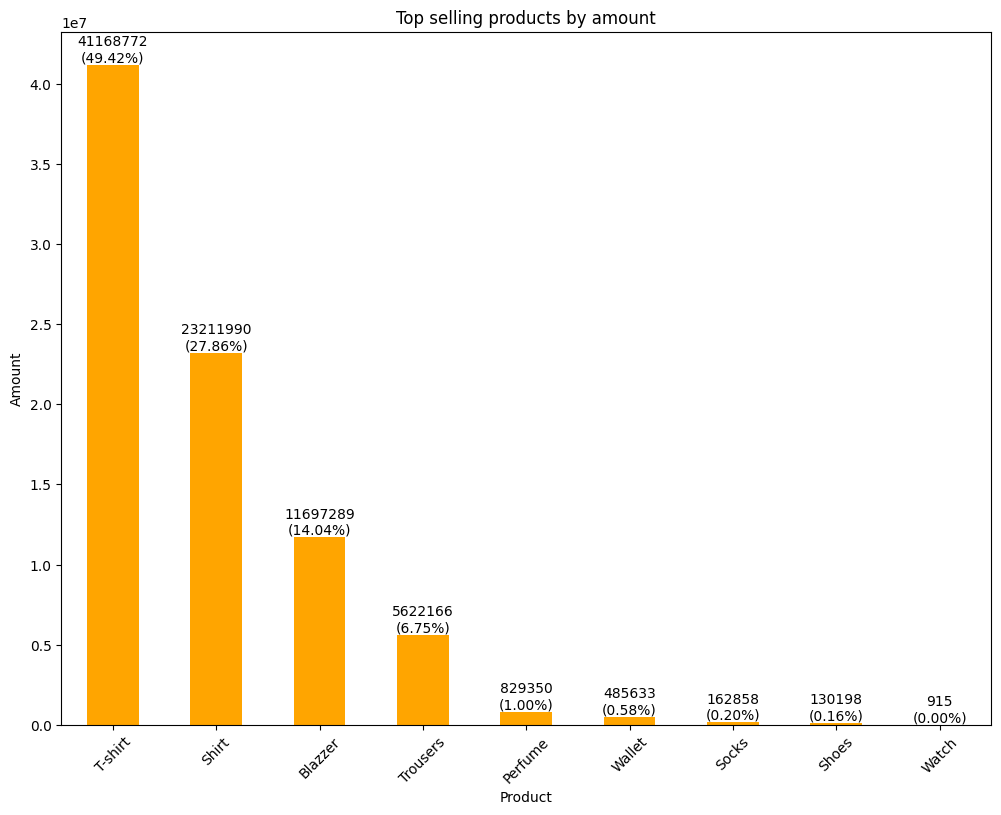

In [188]:
plt.figure(figsize=(12, 9))
top_products_amount.plot(kind='bar', color='orange')
plt.title('Top selling products by amount')
plt.xlabel('Product')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Calculate total sales for percentage calculation

# Add labels with value and percentage
for i, value in enumerate(top_products_amount):
    percentage = (value / total_sales) * 100
    plt.text(i, value + 0.5, f"{value:.0f}\n({percentage:.2f}%)", ha='center', va='bottom', fontsize=10)

plt.show()


In [102]:
repeat_customers = df.groupby('Order ID')['Amount'].sum().reset_index()
repeat_buyers = repeat_customers[repeat_customers['Amount'] > average_order_value]

In [103]:
repeat_percentage = len(repeat_buyers) / len(repeat_customers) * 100
one_time_percentage = 100 - repeat_percentage

In [104]:
print(f"Repeat Customers: {repeat_percentage:.2f}%")
print(f"One-time Customers: {one_time_percentage:.2f}%")

Repeat Customers: 40.76%
One-time Customers: 59.24%


In [105]:
segment_purchase_trends = customer_segment.groupby('Segment')['Amount'].mean()


posx and posy should be finite values
posx and posy should be finite values


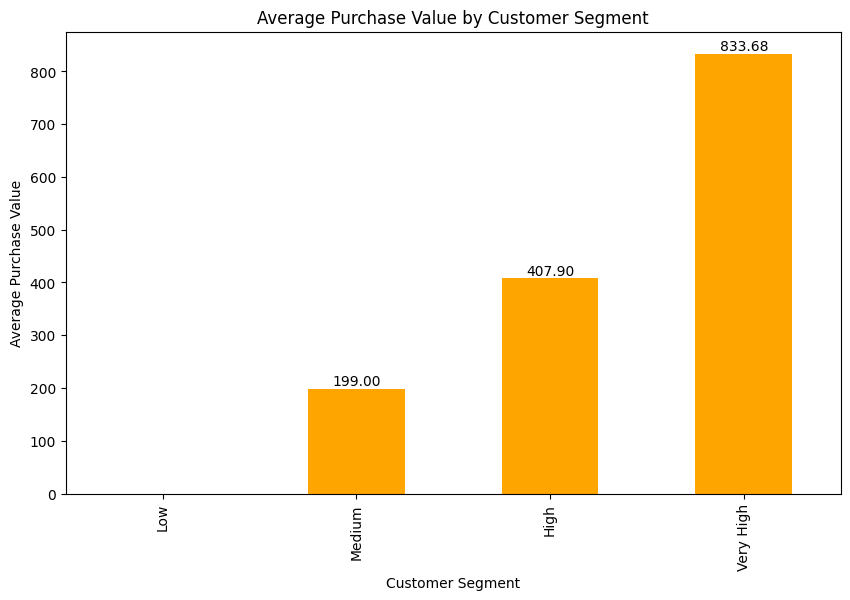

In [107]:
plt.figure(figsize=(10, 6))
segment_purchase_trends.plot(kind='bar', color='orange')
plt.title('Average Purchase Value by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Purchase Value')
for i, value in enumerate(segment_purchase_trends):
    plt.text(i, value + 0.5, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
plt.show()